Importing the required libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os

In [3]:
training_set = pd.read_excel("Data_Train.xlsx")
test_set = pd.read_excel("Data_Test.xlsx")

Data Pre-Processing

In [4]:
training_set.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [5]:
print("Number of features in the datasets :")
print("Training Set : ", len(training_set.columns))
print("Test Set : ",len(test_set.columns))

Number of features in the datasets :
Training Set :  12
Test Set :  11


In [6]:
print("Number of features in the datasets :")
print("Training Set : ", list(training_set.columns))
print("Test Set : ",list(test_set.columns))

Number of features in the datasets :
Training Set :  ['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']
Test Set :  ['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']


In [7]:
print("Datatypes of features in the datasets :")
print("Training Set : \n", training_set.dtypes)
print("Test Set : \n",test_set.dtypes)

Datatypes of features in the datasets :
Training Set : 
 Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object
Test Set : 
 Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
dtype: object


In [8]:
print("Number of rows in the datasets :")
print("Training Set : ", len(training_set))
print("Test Set : ",len(test_set))

Number of rows in the datasets :
Training Set :  6019
Test Set :  1234


In [9]:
print("\n\nEmpty cells or Nans in the datasets :")
print("\nTraining Set : \n",training_set.isnull().values.any())
print("\nTest Set : \n",test_set.isnull().values.any())



Empty cells or Nans in the datasets :

Training Set : 
 True

Test Set : 
 True


In [10]:
print("\n\nNumber of empty cells or Nans in the datasets :")
print("\nTraining Set : \n", training_set.isnull().sum())
print("\nTest Set : \n",test_set.isnull().sum())



Number of empty cells or Nans in the datasets :

Training Set : 
 Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

Test Set : 
 Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                10
Seats                11
dtype: int64


In [11]:
all_brands = list(training_set.Name) + list(test_set.Name)
all_locations = list(training_set.Location) + list(test_set.Location)
all_fuel_types = list(training_set.Fuel_Type) + list(test_set.Fuel_Type)
all_transmissions = list(training_set.Transmission) + list(test_set.Transmission)
all_owner_types = list(training_set.Owner_Type) + list(test_set.Owner_Type)

In [12]:
print("\nNumber Of Unique Values In Name : \n ", len(set(all_brands)))

print("\nNumber Of Unique Values In Location : \n ", len(set(all_locations)))
print("\nThe Unique Values In Location : \n ", set(all_locations) )

print("\nNumber Of Unique Values In Fuel_Type : \n ", len(set(all_fuel_types)))
print("\nThe Unique Values In Fuel_Type : \n ", set(all_fuel_types) )

print("\nNumber Of Unique Values In Transmission : \n ", len(set(all_transmissions)))
print("\nThe Unique Values In Transmission : \n ", set(all_transmissions) )

print("\nNumber Of Unique Values In Owner_Type : \n ", len(set(all_owner_types)))
print("\nThe Unique Values In Owner_Type : \n " ,set(all_owner_types) )


Number Of Unique Values In Name : 
  2041

Number Of Unique Values In Location : 
  11

The Unique Values In Location : 
  {'Hyderabad', 'Chennai', 'Delhi', 'Bangalore', 'Pune', 'Coimbatore', 'Jaipur', 'Kochi', 'Mumbai', 'Kolkata', 'Ahmedabad'}

Number Of Unique Values In Fuel_Type : 
  5

The Unique Values In Fuel_Type : 
  {'Petrol', 'CNG', 'LPG', 'Electric', 'Diesel'}

Number Of Unique Values In Transmission : 
  2

The Unique Values In Transmission : 
  {'Automatic', 'Manual'}

Number Of Unique Values In Owner_Type : 
  4

The Unique Values In Owner_Type : 
  {'First', 'Third', 'Fourth & Above', 'Second'}


In [13]:
names = list(training_set.Name)
brand = []
model = []
for i in range(len(names)):
   try:
       brand.append(names[i].split(" ")[0].strip())
       try:
           model.append(" ".join(names[i].split(" ")[1:]).strip())
       except:
           pass
   except:
       print("ERR ! - ", names[i], "@" , i)
training_set["Brand"] =  brand
training_set["Model"] = model
training_set.drop(labels = ['Name'], axis = 1, inplace = True)

In [14]:
names = list(test_set.Name)
brand = []
model = []
for i in range(len(names)):
   try:
       brand.append(names[i].split(" ")[0].strip())
       try:
           model.append(" ".join(names[i].split(" ")[1:]).strip())
       except:
           pass
   except:
       print("ERR ! - ", names[i], "@" , i)
test_set["Brand"] =  brand
test_set["Model"] = model
test_set.drop(labels = ['Name'], axis = 1, inplace = True)

In [15]:
training_set.Mileage = training_set.Mileage.fillna(0.0)
mileage = list(training_set.Mileage)
for i in range(len(mileage)):
    mileage[i] = str(mileage[i]).split(" ")[0].strip()
training_set['Mileage'] = mileage
training_set['Mileage'] = training_set['Mileage'].astype(float)

In [16]:
training_set.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998 CC,58.16 bhp,5.0,1.75,Maruti,Wagon R LXI CNG
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582 CC,126.2 bhp,5.0,12.50,Hyundai,Creta 1.6 CRDi SX Option
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199 CC,88.7 bhp,5.0,4.50,Honda,Jazz V
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248 CC,88.76 bhp,7.0,6.00,Maruti,Ertiga VDI
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968 CC,140.8 bhp,5.0,17.74,Audi,A4 New 2.0 TDI Multitronic


In [17]:
test_set.Mileage = test_set.Mileage.fillna(0.0)
mileage = list(test_set.Mileage)
for i in range(len(mileage)):
    mileage[i] = str(mileage[i]).split(" ")[0].strip()
test_set['Mileage'] = mileage
test_set['Mileage'] = test_set['Mileage'].astype(float)

In [18]:
test_set.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model
0,Delhi,2014,40929,CNG,Manual,First,32.26,998 CC,58.2 bhp,4.0,Maruti,Alto K10 LXI CNG
1,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796 CC,47.3 bhp,5.0,Maruti,Alto 800 2016-2019 LXI
2,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393 CC,147.8 bhp,7.0,Toyota,Innova Crysta Touring Sport 2.4 MT
3,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364 CC,null bhp,5.0,Toyota,Etios Liva GD
4,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197 CC,82.85 bhp,5.0,Hyundai,i20 Magna


In [19]:
training_set.Engine = training_set.Engine.fillna(0)
engine = list(training_set.Engine)
for i in range(len(engine)):
    engine[i] = str(engine[i]).split(" ")[0].strip()
training_set['Engine'] = engine
training_set['Engine'] = training_set['Engine'].astype(int)
training_set.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16 bhp,5.0,1.75,Maruti,Wagon R LXI CNG
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2 bhp,5.0,12.50,Hyundai,Creta 1.6 CRDi SX Option
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.7 bhp,5.0,4.50,Honda,Jazz V
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76 bhp,7.0,6.00,Maruti,Ertiga VDI
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.8 bhp,5.0,17.74,Audi,A4 New 2.0 TDI Multitronic


In [20]:
test_set.Engine = test_set.Engine.fillna(0)
engine = list(test_set.Engine)
for i in range(len(engine)):
    engine[i] = str(engine[i]).split(" ")[0].strip()
test_set['Engine'] = engine
test_set['Engine'] = test_set['Engine'].astype(int)

In [21]:
training_set.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16 bhp,5.0,1.75,Maruti,Wagon R LXI CNG
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2 bhp,5.0,12.50,Hyundai,Creta 1.6 CRDi SX Option
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.7 bhp,5.0,4.50,Honda,Jazz V
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76 bhp,7.0,6.00,Maruti,Ertiga VDI
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.8 bhp,5.0,17.74,Audi,A4 New 2.0 TDI Multitronic


In [22]:
training_set.Power = training_set.Power.fillna(0.0)
power = list(training_set.Power)
for i in range(len(power)):
    power[i] = str(power[i]).split(" ")[0].strip()
training_set['Power'] = power

In [23]:
training_set['Power'] = training_set['Power'].str.replace("null", "0.0", case = False) 

In [24]:
training_set['Power'] = training_set['Power'].astype(float)

In [25]:
training_set.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,1.75,Maruti,Wagon R LXI CNG
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50,Hyundai,Creta 1.6 CRDi SX Option
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,4.50,Honda,Jazz V
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00,Maruti,Ertiga VDI
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,17.74,Audi,A4 New 2.0 TDI Multitronic


In [26]:
training_set.dtypes

Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine                 int32
Power                float64
Seats                float64
Price                float64
Brand                 object
Model                 object
dtype: object

In [27]:
test_set.Power = test_set.Power.fillna(0.0)
power = list(test_set.Power)
for i in range(len(power)):
    power[i] = str(power[i]).split(" ")[0].strip()
test_set['Power'] = power

In [28]:
test_set['Power'] = test_set['Power'].str.replace("null", "0.0", case = False) 
test_set['Power'] = test_set['Power'].astype(float)

In [29]:
test_set.dtypes

Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine                 int32
Power                float64
Seats                float64
Brand                 object
Model                 object
dtype: object

In [30]:
training_set.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,1.75,Maruti,Wagon R LXI CNG
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50,Hyundai,Creta 1.6 CRDi SX Option
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,4.50,Honda,Jazz V
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00,Maruti,Ertiga VDI
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,17.74,Audi,A4 New 2.0 TDI Multitronic


In [31]:
test_set.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model
0,Delhi,2014,40929,CNG,Manual,First,32.26,998,58.20,4.0,Maruti,Alto K10 LXI CNG
1,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796,47.30,5.0,Maruti,Alto 800 2016-2019 LXI
2,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393,147.80,7.0,Toyota,Innova Crysta Touring Sport 2.4 MT
3,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364,0.00,5.0,Toyota,Etios Liva GD
4,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197,82.85,5.0,Hyundai,i20 Magna


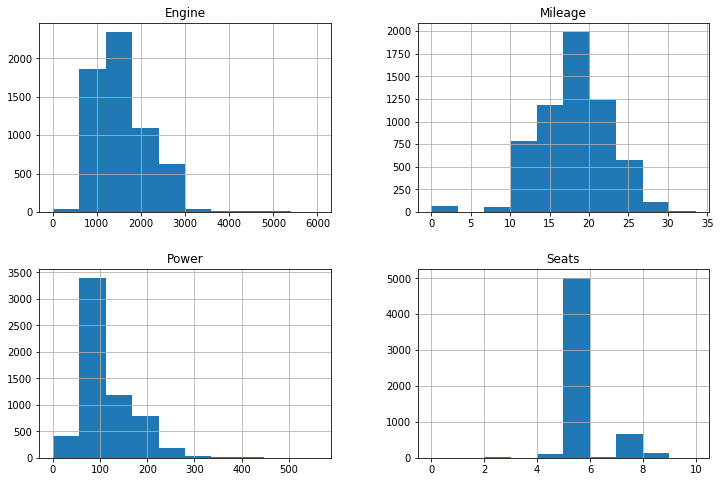

In [32]:
features = ['Mileage', 'Engine','Power','Seats']
training_set[features].hist(figsize=(12, 8));

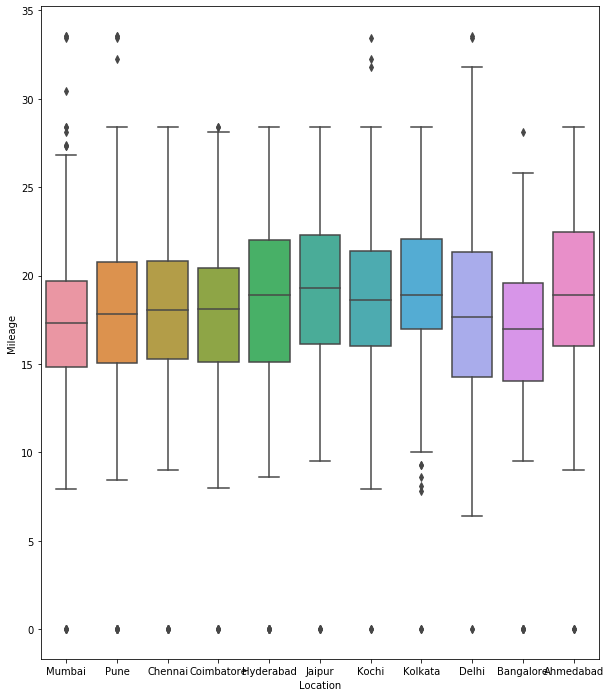

In [33]:
plt.figure(figsize=(10,12))
sns.boxplot(x = 'Location', y = 'Mileage', data = training_set) 

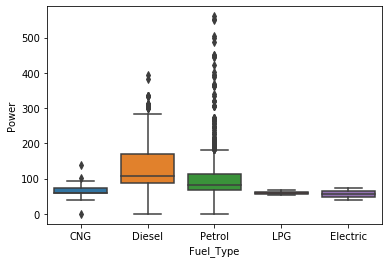

In [34]:
sns.boxplot(x = 'Fuel_Type', y = 'Power', data = training_set) 

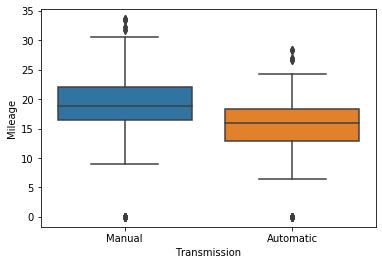

In [35]:
sns.boxplot(x = 'Transmission', y = 'Mileage', data = training_set) 

In [36]:
training_set.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,1.75,Maruti,Wagon R LXI CNG
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50,Hyundai,Creta 1.6 CRDi SX Option
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,4.50,Honda,Jazz V
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00,Maruti,Ertiga VDI
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,17.74,Audi,A4 New 2.0 TDI Multitronic


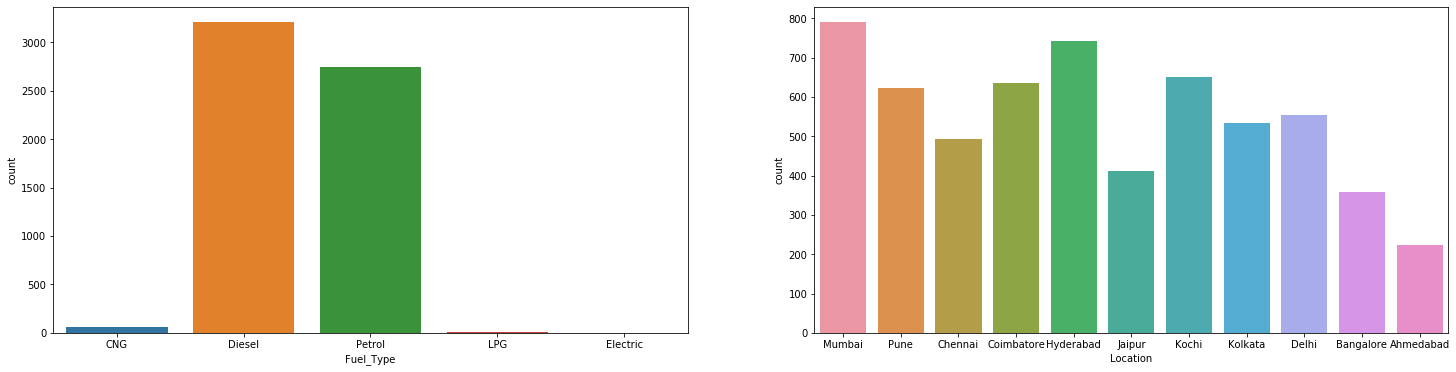

In [37]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 6))
sns.countplot(x='Fuel_Type', data=training_set, ax=axes[0]);
sns.countplot(x='Location', data=training_set, ax=axes[1]);

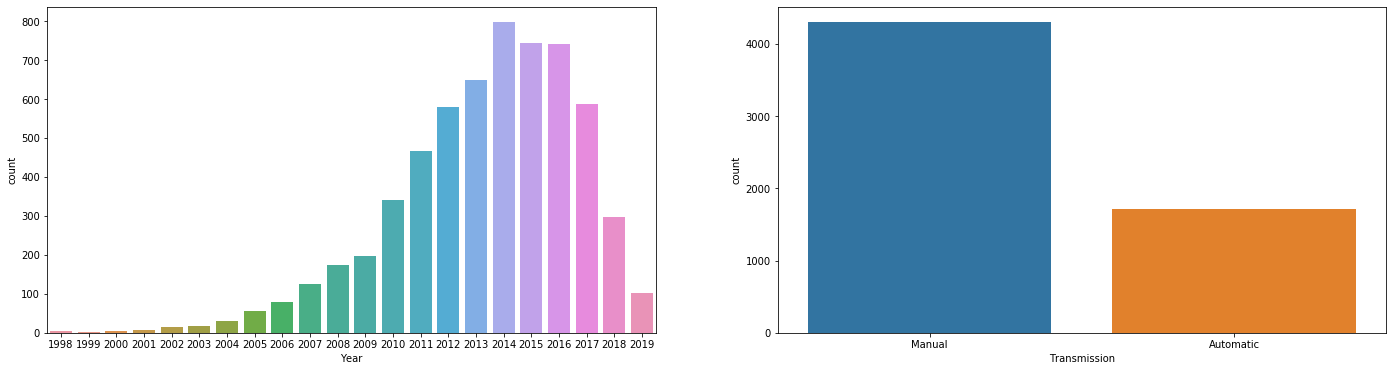

In [38]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
sns.countplot(x='Year', data=training_set, ax=axes[0]);
sns.countplot(x='Transmission', data=training_set, ax=axes[1]);

Inserting a correlation matrix for numerical variables

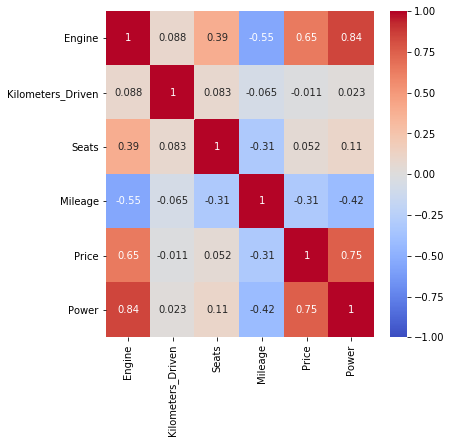

In [39]:
numerical = list(set(training_set.columns) - 
                 set(['Location', 'Year', 'Fuel_Type', 
                      'Transmission', 'Owner_Type', 'Brand','Model']))

corr_matrix = training_set[numerical].corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix, vmin=-1,
            cmap='coolwarm',
            annot=True);

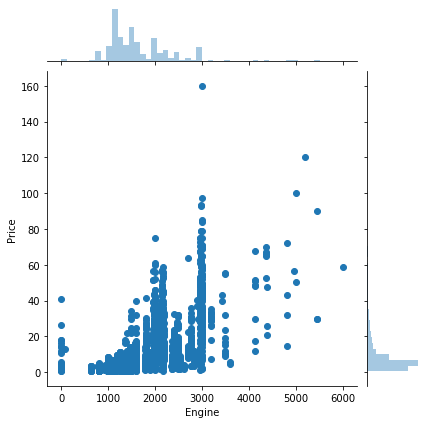

In [40]:
sns.jointplot(x='Engine', y='Price',data=training_set, kind='scatter');

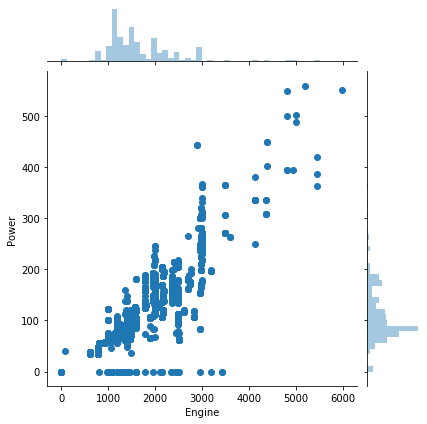

In [41]:
sns.jointplot(x='Engine', y='Power',data=training_set, kind='scatter');

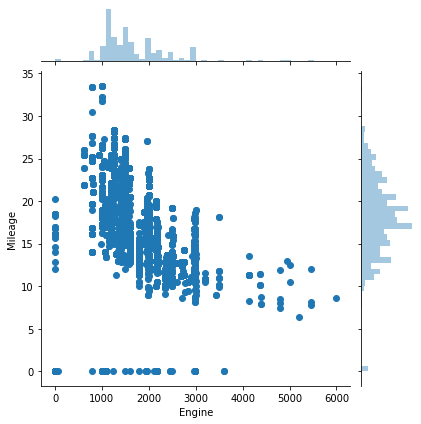

In [42]:
sns.jointplot(x='Engine', y='Mileage',data=training_set, kind='scatter');

In [43]:
training_set.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,1.75,Maruti,Wagon R LXI CNG
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50,Hyundai,Creta 1.6 CRDi SX Option
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,4.50,Honda,Jazz V
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00,Maruti,Ertiga VDI
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,17.74,Audi,A4 New 2.0 TDI Multitronic


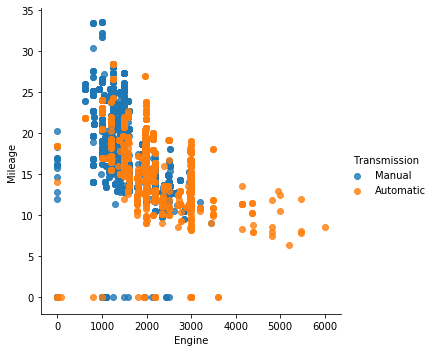

In [44]:
sns.lmplot('Engine', 'Mileage', data=training_set, hue='Transmission', fit_reg=False);

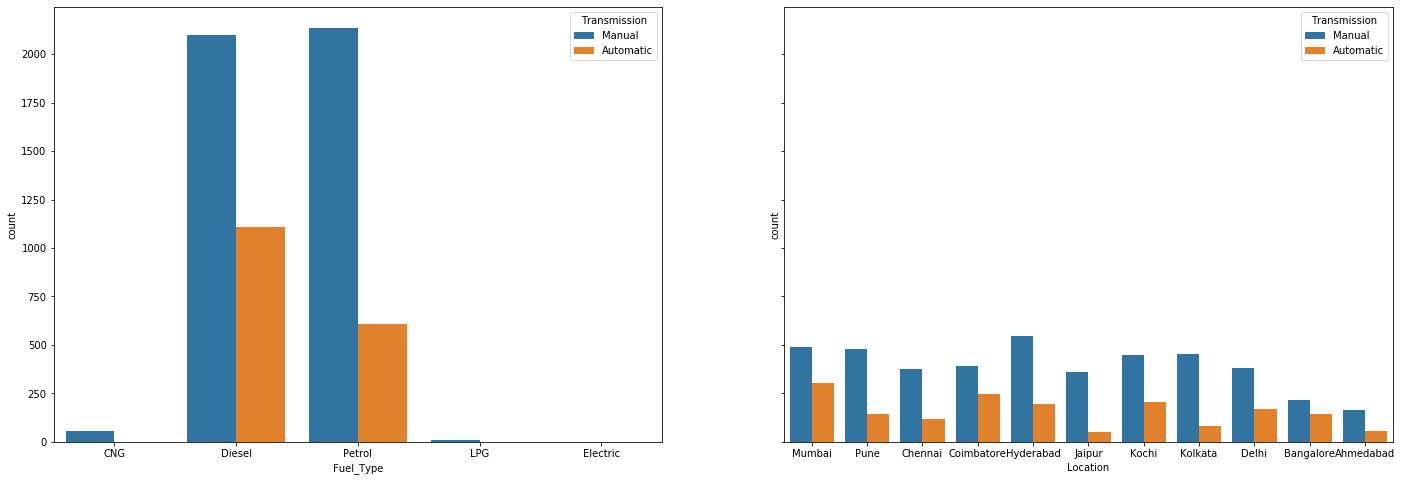

In [45]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(24, 8))

sns.countplot(x='Fuel_Type', hue='Transmission', data=training_set, ax=axes[0]);
sns.countplot(x='Location', hue='Transmission', data=training_set, ax=axes[1]);

In [46]:
# inserting a contingency table
pd.crosstab(training_set['Brand'], training_set['Transmission']).T

Brand,Ambassador,Audi,BMW,Bentley,Chevrolet,Datsun,Fiat,Force,Ford,Honda,...,Mitsubishi,Nissan,Porsche,Renault,Skoda,Smart,Tata,Toyota,Volkswagen,Volvo
Transmission,,,,,,,,,,,,,,,,,,,,,
Automatic,0,236,267,1,9,0,0,0,39,130,...,6,12,17,18,93,1,11,99,59,20
Manual,1,0,0,0,112,13,28,3,261,478,...,21,79,1,127,80,0,175,312,256,1


In [47]:
 all_brands = list(set(list(training_set.Brand) + list(test_set.Brand)))
all_models = list(set(list(training_set.Model) + list(test_set.Model)))
all_locations = list(set(list(training_set.Location) + list(test_set.Location)))
all_fuel_types = list(set(list(training_set.Fuel_Type) + list(test_set.Fuel_Type)))
all_transmissions = list(set(list(training_set.Transmission) + list(test_set.Transmission)))
all_owner_types = list(set(list(training_set.Owner_Type) + list(test_set.Owner_Type)))

In [48]:
from sklearn.preprocessing import LabelEncoder
le_brands = LabelEncoder()
le_models = LabelEncoder()
le_locations = LabelEncoder()
le_fuel_types = LabelEncoder()
le_transmissions = LabelEncoder()
le_owner_types = LabelEncoder()

In [49]:
le_brands.fit(all_brands)
le_models.fit(all_models)
le_locations.fit(all_locations)
le_fuel_types.fit(all_fuel_types)
le_transmissions.fit(all_transmissions)
le_owner_types.fit(all_owner_types)

LabelEncoder()

 Applying training set to encoding

In [50]:
training_set['Brand'] = le_brands.transform(training_set['Brand'])
training_set['Model'] = le_models.transform(training_set['Model'])
training_set['Location'] = le_locations.transform(training_set['Location'])
training_set['Fuel_Type'] = le_fuel_types.transform(training_set['Fuel_Type'])
training_set['Transmission'] = le_transmissions.transform(training_set['Transmission'])
training_set['Owner_Type'] = le_owner_types.transform(training_set['Owner_Type'])

In [51]:
test_set['Brand'] = le_brands.transform(test_set['Brand'])
test_set['Model'] = le_models.transform(test_set['Model'])
test_set['Location'] = le_locations.transform(test_set['Location'])
test_set['Fuel_Type'] = le_fuel_types.transform(test_set['Fuel_Type'])
test_set['Transmission'] = le_transmissions.transform(test_set['Transmission'])
test_set['Owner_Type'] = le_owner_types.transform(test_set['Owner_Type'])

In [52]:
training_set.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
0,9,2010,72000,0,1,0,26.60,998,58.16,5.0,1.75,19,1797
1,10,2015,41000,1,1,0,19.67,1582,126.20,5.0,12.50,11,498
2,2,2011,46000,4,1,0,18.20,1199,88.70,5.0,4.50,10,993
3,2,2012,87000,1,1,0,20.77,1248,88.76,7.0,6.00,19,676
4,3,2013,40670,1,0,2,15.20,1968,140.80,5.0,17.74,1,105


In [53]:
training_set = training_set[['Brand', 'Model', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
      'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']]
test_set = test_set[['Brand', 'Model', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
      'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']]

In [54]:
training_set.head()

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,19,1797,9,2010,72000,0,1,0,26.60,998,58.16,5.0,1.75
1,11,498,10,2015,41000,1,1,0,19.67,1582,126.20,5.0,12.50
2,10,993,2,2011,46000,4,1,0,18.20,1199,88.70,5.0,4.50
3,19,676,2,2012,87000,1,1,0,20.77,1248,88.76,7.0,6.00
4,1,105,3,2013,40670,1,0,2,15.20,1968,140.80,5.0,17.74


In [55]:
Y_train_data = training_set.iloc[:, -1].values

X_train_data = training_set.iloc[:,0 : -1].values

X_test = test_set.iloc[:,:].values

In [56]:
from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
imputer = imputer.fit(X_train_data[:,8:12]) 
X_train_data[:,8:12] = imputer.transform(X_train_data[:,8:12])

imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
imputer = imputer.fit(X_test[:,8:12]) 
X_test[:,8:12] = imputer.transform(X_test[:,8:12])

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X_train_data, Y_train_data, test_size = 0.2, random_state = 1)

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_data = sc.fit_transform(X_train_data)

In [59]:
Y_train_data = Y_train_data.reshape((len(Y_train_data), 1))

In [60]:
Y_train_data = sc.fit_transform(Y_train_data)
Y_train_data = Y_train_data.ravel()

X_test = sc.transform(X_test)

X_train = sc.fit_transform(X_train)
X_val = sc.fit_transform(X_val)

Y_train = Y_train.reshape((len(Y_train), 1)) 
Y_train = sc.fit_transform(Y_train)
Y_train = Y_train.ravel()

In [61]:
def score(y_pred, y_true):
   error = np.square(np.log10(y_pred +1) - np.log10(y_true +1)).mean() ** 0.5
   score = 1 - error
   return score


y_true = Y_val

In [62]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train,Y_train)
Y_pred = sc.inverse_transform(rf.predict(X_val))

for i in range(len(Y_pred)):
   if Y_pred[i] < 0:
       Y_pred[i] = 0
        
print("Random Forest classifier score : ",score(Y_pred,y_true))

Random Forest classifier score :  0.9191800191511573


In [63]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()


lr.fit(X_train,Y_train)


Y_pred = sc.inverse_transform(lr.predict(X_val))


for i in range(len(Y_pred)):
   if Y_pred[i] < 0:
       Y_pred[i] = 0

print("Linear Regression Score : ", score(Y_pred, y_true))

Linear Regression Score :  0.7592849173452433


In [64]:
rf2 = RandomForestRegressor(n_estimators = 100)

rf2.fit(X_train_data,Y_train_data)

Y_pred2 = sc.inverse_transform(rf2.predict(X_test))

for i in range(len(Y_pred2)):
   if Y_pred2[i] < 0:
       Y_pred2[i] = 0

# saving the predictions to an excel sheet
pd.DataFrame(Y_pred2, columns = ['Price']).to_excel("Major_Project_Predictions_ShivamAgarwalla.xlsx")